In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import statsmodels.stats.proportion as sp

import matplotlib.pyplot as plt
import seaborn as sns
import math

# Dataset Churn Modelling

In [4]:
# Import dataset
#raw_data merupakan raw data
df_raw = pd.read_csv ('Churn_Modelling.csv')

#df_string untuk mengubah tipe data menjadi string
df_string = pd.read_csv ('Churn_Modelling.csv')

In [5]:
df_string.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Descriptive Statistic

In [6]:
# Mengetahui tipe tiap data
df_string.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df_string['NumOfProducts'] = df_string['NumOfProducts'].astype('str')
df_string['HasCrCard'] = df_string['HasCrCard'].astype('str')
df_string['IsActiveMember'] = df_string['IsActiveMember'].astype('str')
df_string['Exited'] = df_string['Exited'].astype('str')

In [8]:
df_string.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  object 
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 1.1+ MB


In [9]:
# Memisahkan tiap kolom dari numerik dan kategorik
numerik = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
kategorik = ['Geography', 'Gender', 'NumOfProducts', 'IsActiveMember', 'HasCrCard', 'Exited']

In [10]:
df_string[kategorik].describe()

,Geography,Gender,NumOfProducts,IsActiveMember,HasCrCard,Exited
count,10000,10000,10000,10000,10000,10000
unique,3,2,4,2,2,2
top,France,Male,1,1,1,0
freq,5014,5457,5084,5151,7055,7963


In [11]:
df_string[numerik].describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,199992.480000


In [12]:
df_string.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
# Mengetahui apakah ada data yang terduplikat sebelum menghapus kolom RowNumber, CustomerID, dan Surname
df_raw.duplicated().sum()

0

In [14]:
# Menghapus kolom RowNumber, CustomerID, dan Surname
df_string = df_string.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [15]:
# Mengetahui apakah data data yang terduplikat
df_string.duplicated().sum()

0

In [16]:
df_string.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  object 
 7   HasCrCard        10000 non-null  object 
 8   IsActiveMember   10000 non-null  object 
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 859.5+ KB


A. Data memiliki 10000 baris, 14 kolom, dan tidak memiliki missing value. Terdapat tipe data yang kurang sesuai yaitu NumOfProducts, IsActiveMember, HasCrCard, dan Exited yang seharusnya bertipe data string. <br>
B. Tidak ada data yang kosong atau duplikat setelah drop kolom rownumber, customerId, dan Surname.<br>
C.
- Hasil analisis summary pada data numerik tidak ada yang aneh, hal ini dapat dilihat dari nilai Mean dan Median memiliki nilai yang tidak jauh berbeda.
- Pada data kategori, setiap unique value pada masing-masing kolom sesuai (menunjukkan diversity yang kecil).
- Frekuensi dari masing-masing kolom kategori sesuai dan tidak terdapat ketimpangan yang signifikan.

# Univariate Analysis

In [17]:
df = df_raw.copy()

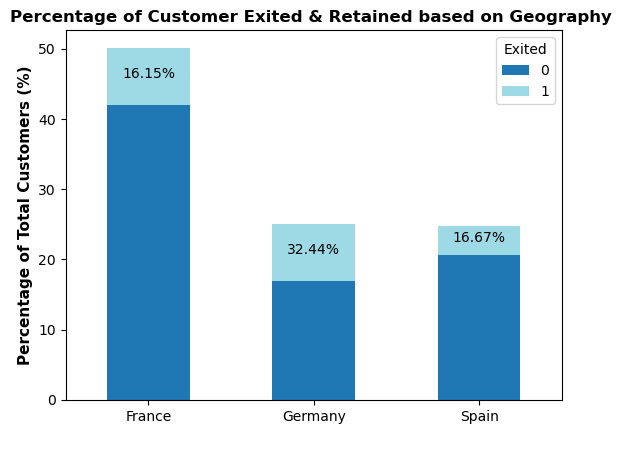

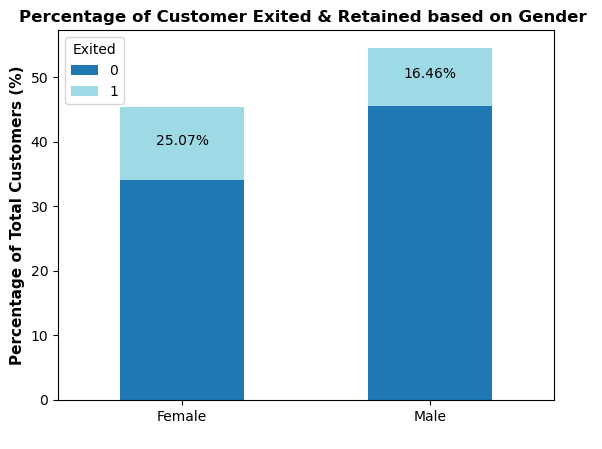

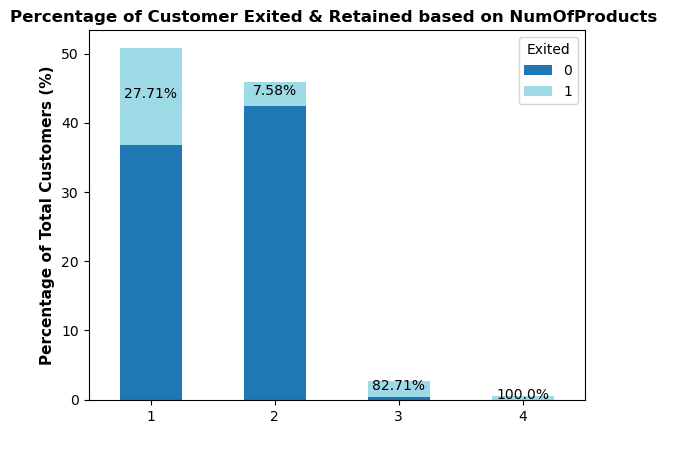

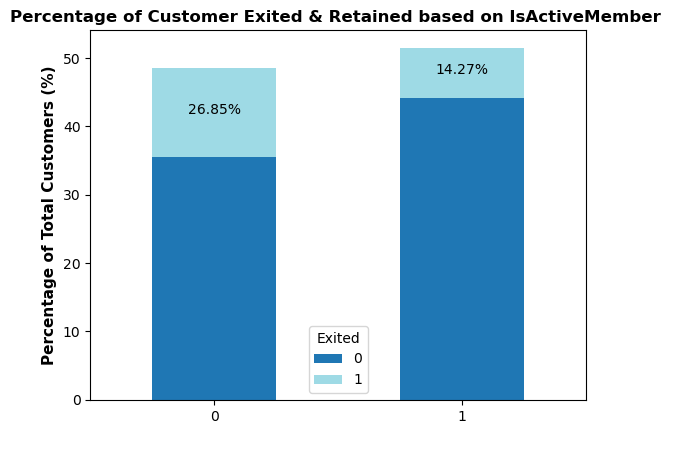

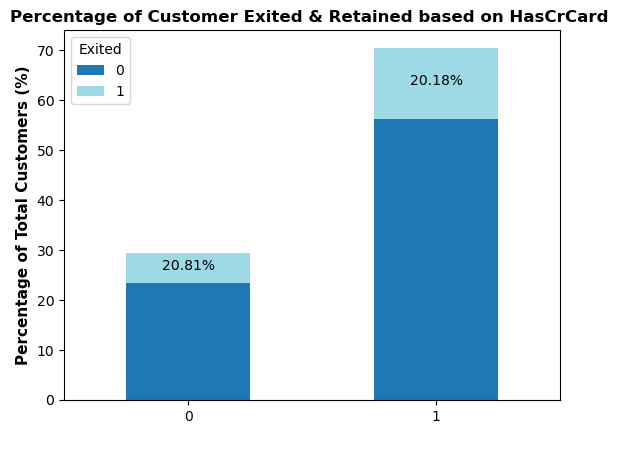

In [18]:
df = df_raw.copy()

# visualisasi fiture kategori terhadap target
for col in kategorik:
  if col != 'Exited':
    dfg = df.groupby([col, 'Exited'])['CustomerId'].nunique().reset_index()
    dfg_a = df.groupby([col, 'Exited'])['CustomerId'].nunique().reset_index()
    dfg = df.groupby(col)['CustomerId'].nunique().reset_index()

    dfg['total_df'] = [10000 for y in range(df[col].nunique())]

    dfg.rename(columns={'CustomerId':'total_fitur'}, inplace=True)
    dfg_a.rename(columns={'CustomerId':'subtotal'}, inplace=True)

    dfg_merge = dfg_a.merge(dfg, how='left')
    dfg_merge['ratio'] = round(dfg_merge['subtotal']/dfg_merge['total_df']*100, 2)
    dfg_merge['sub_ratio'] = round(dfg_merge['subtotal']/dfg_merge['total_fitur']*100, 2)

    dfg_merge1 = dfg_merge.pivot_table(index=col, columns='Exited', values='sub_ratio')
    dfg_merge2 = dfg_merge.pivot_table(index=col, columns='Exited', values='ratio')

    bar = dfg_merge2.plot(kind = 'bar', stacked = True, colormap = 'tab20')

    for i in bar.containers[int(len(bar.containers)/2):]:
        bar.bar_label(i, padding = 2, fmt = "{:0,.2f}%", label_type='center', labels = [f'{x}%' for x in dfg_merge1[1].values])
    plt.xticks(rotation=0)
    plt.xlabel(' ', fontsize = 8)
    plt.ylabel('Percentage of Total Customers (%)', fontsize = 11, fontweight = 'bold')
    plt.title(f"Percentage of Customer Exited & Retained based on {col} ", fontsize = 12, fontweight = 'bold')
    plt.show()

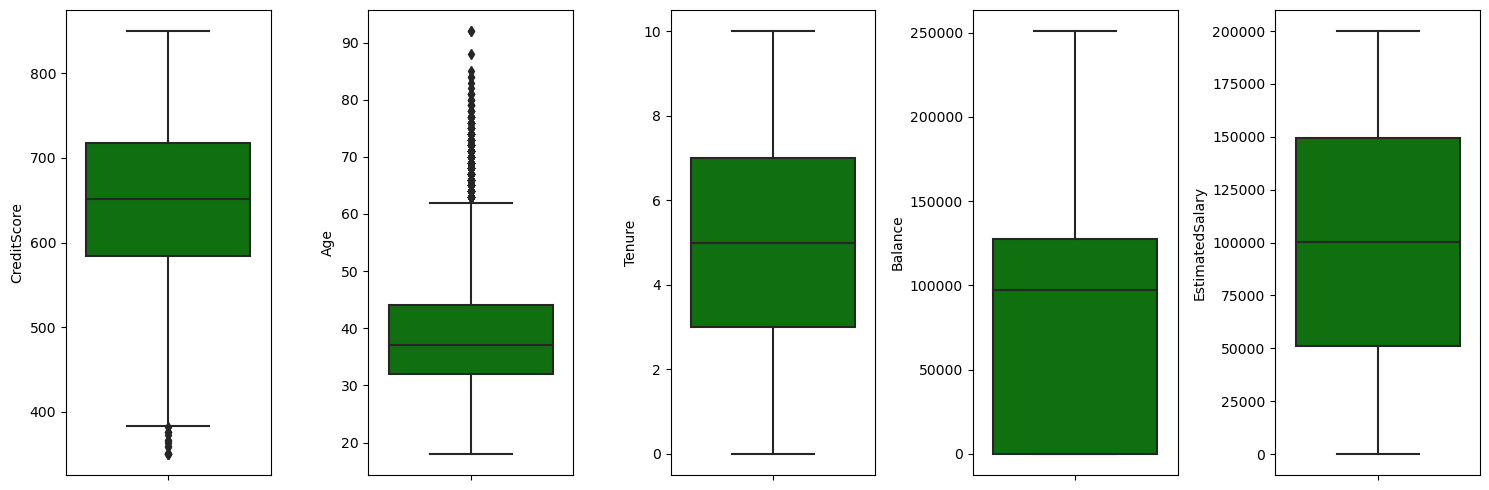

In [19]:
features = numerik
plt.figure(figsize=(15, 5))
for i in range (0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='green', orient='v')
    plt.tight_layout()

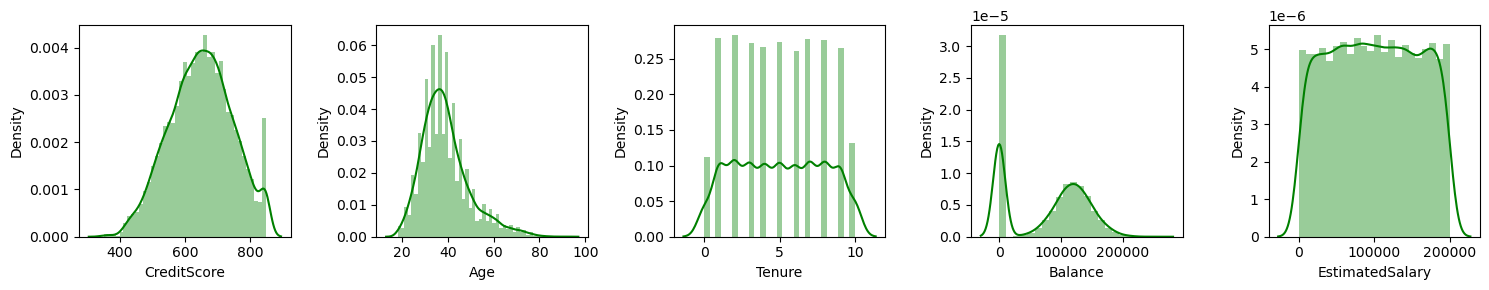

In [20]:
# individual distplot - numeric
plt.figure(figsize=(15, 3))
for i in range(0, len(numerik)):
    plt.subplot(1, 5, i+1)
    sns.distplot(x=df[numerik[i]], color='green')
    plt.xlabel(numerik[i])
    plt.tight_layout()

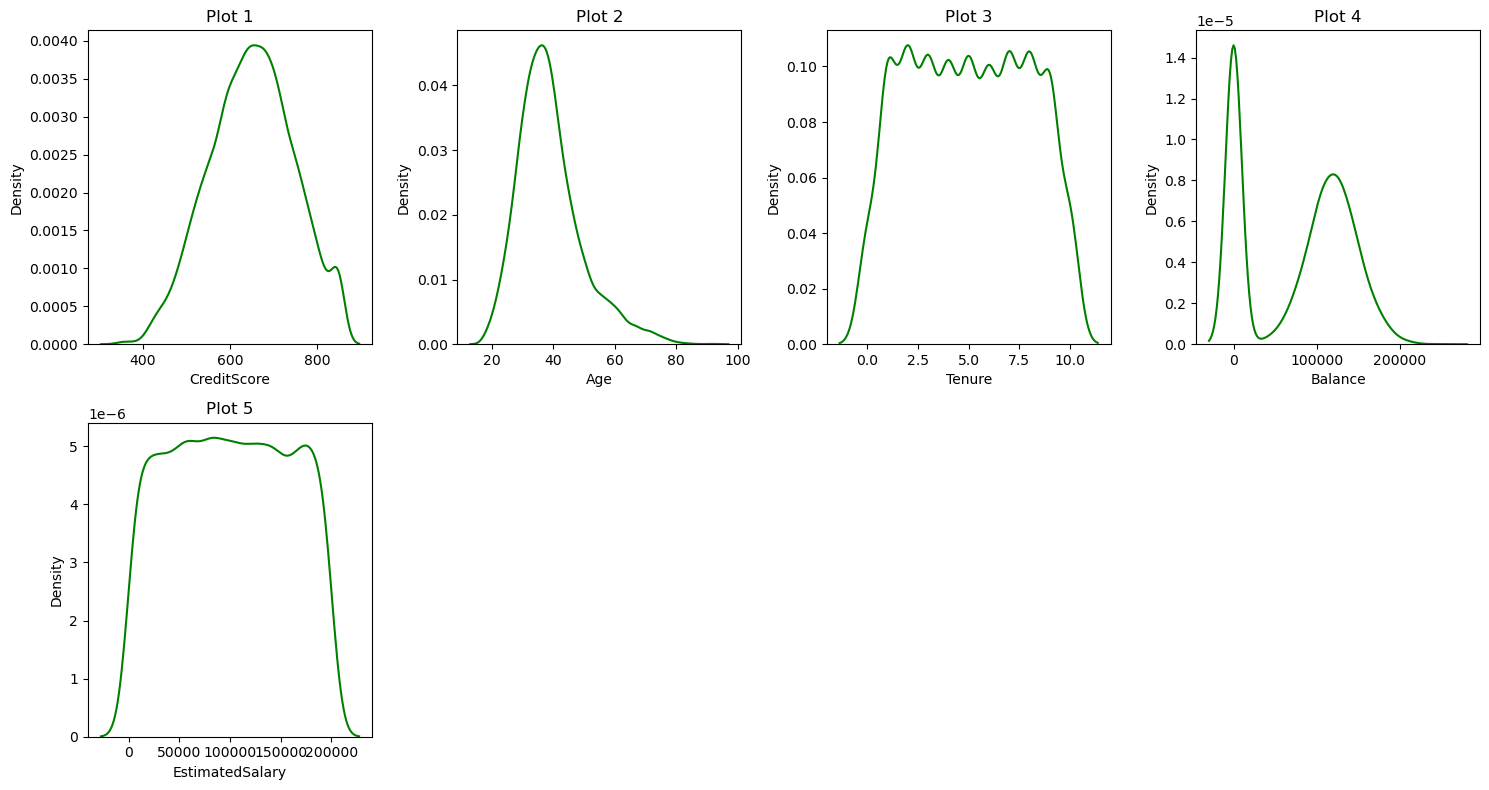

In [21]:
features = numerik
num_plots = len(features)
num_cols = 4
num_rows = math.ceil(num_plots / num_cols)

plt.figure(figsize=(15, 8))  # Sesuaikan ukuran figur sesuai kebutuhan

for i in range(num_plots):
    plt.subplot(num_rows, num_cols, i+1)
    sns.kdeplot(x=df[features[i]], color='green')
    plt.xlabel(features[i])
    plt.title(f'Plot {i+1}')  # Menambahkan judul subplot

plt.tight_layout()
plt.show()

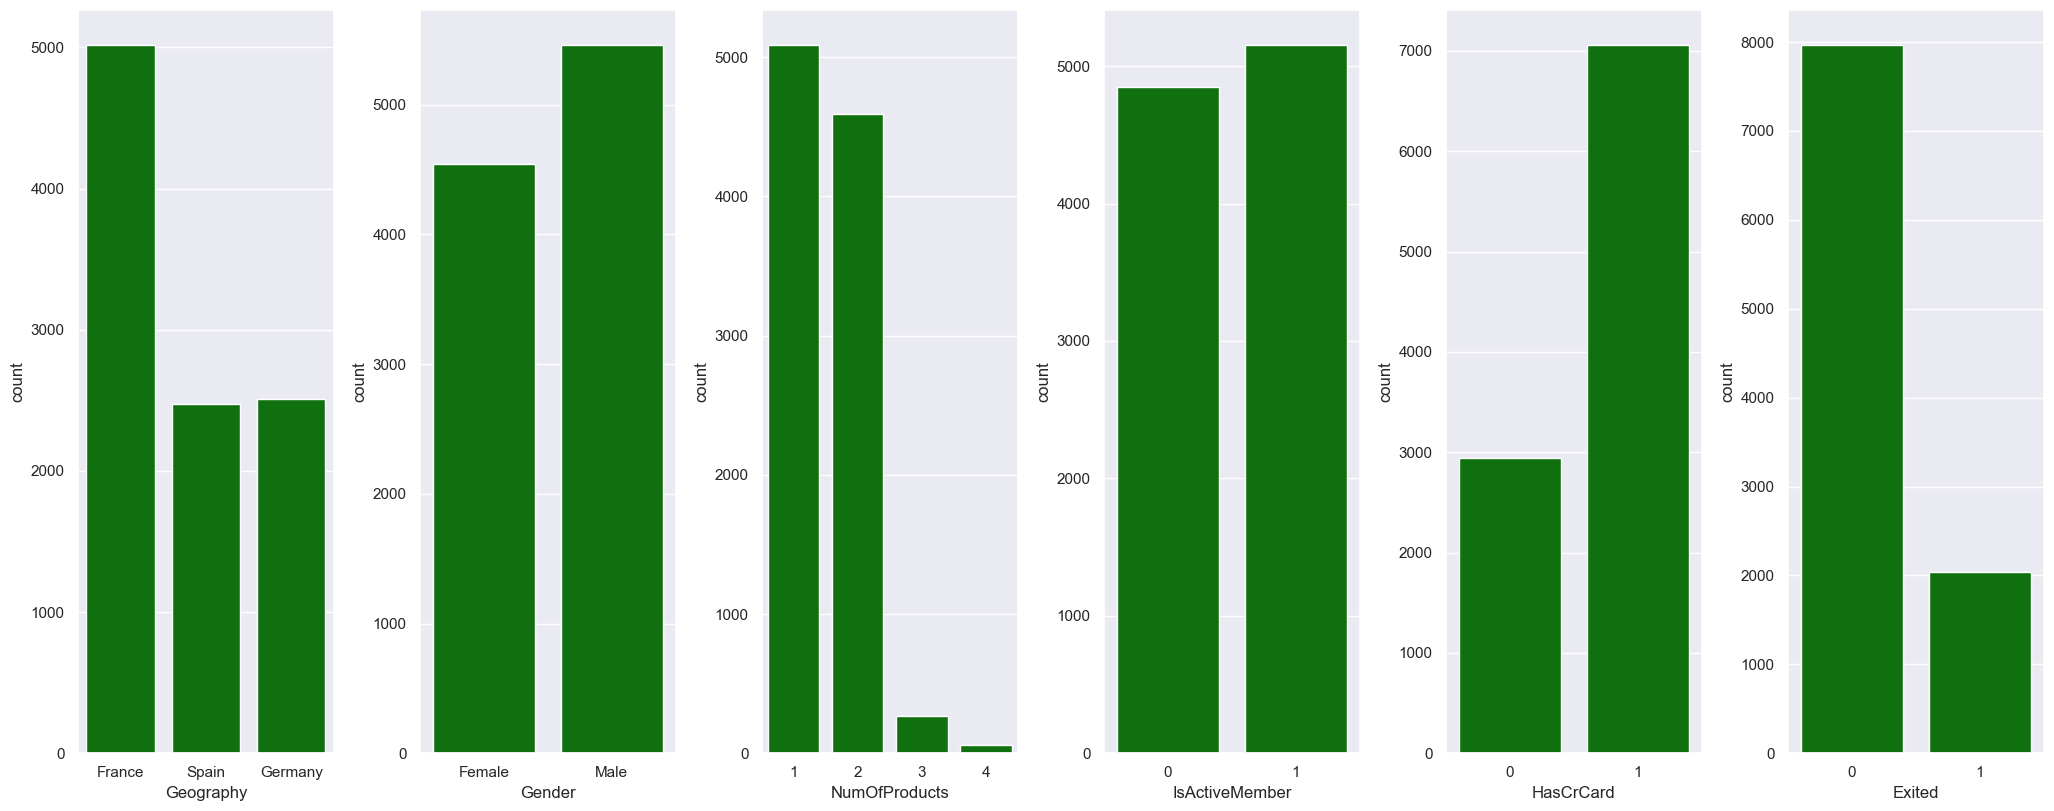

In [22]:
features = kategorik
sns.set(rc={'figure.figsize':(20.7,8.27)})
for i in range (0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.countplot(x=df[features[i]], color='green')
    plt.tight_layout()

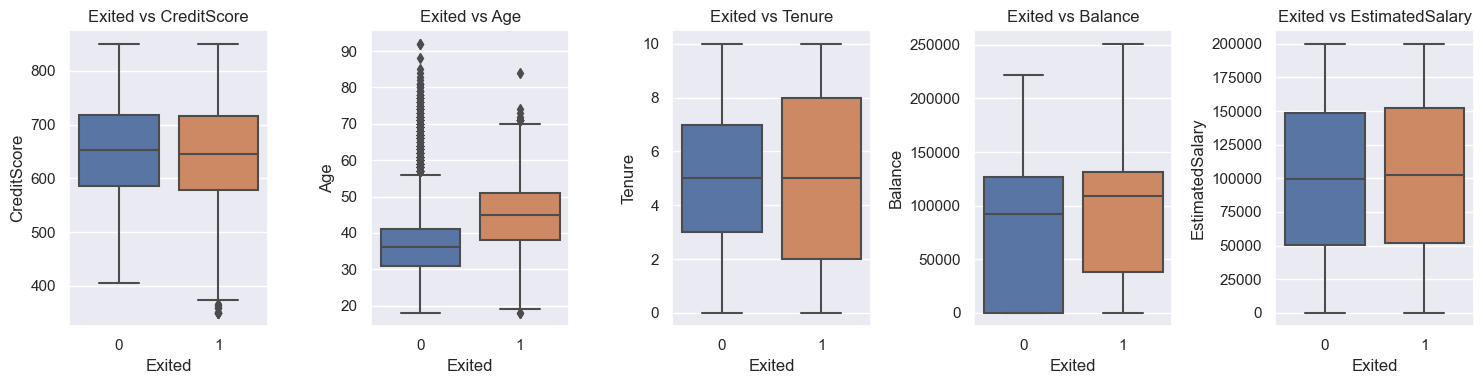

In [23]:
# boxplot fiture numerik terhadap target
plt.figure(figsize=(15, 4))
for i, feature in enumerate(numerik, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(data=df_raw, x='Exited', y=feature)
    plt.title(f'Exited vs {feature}')
plt.tight_layout()
plt.show()

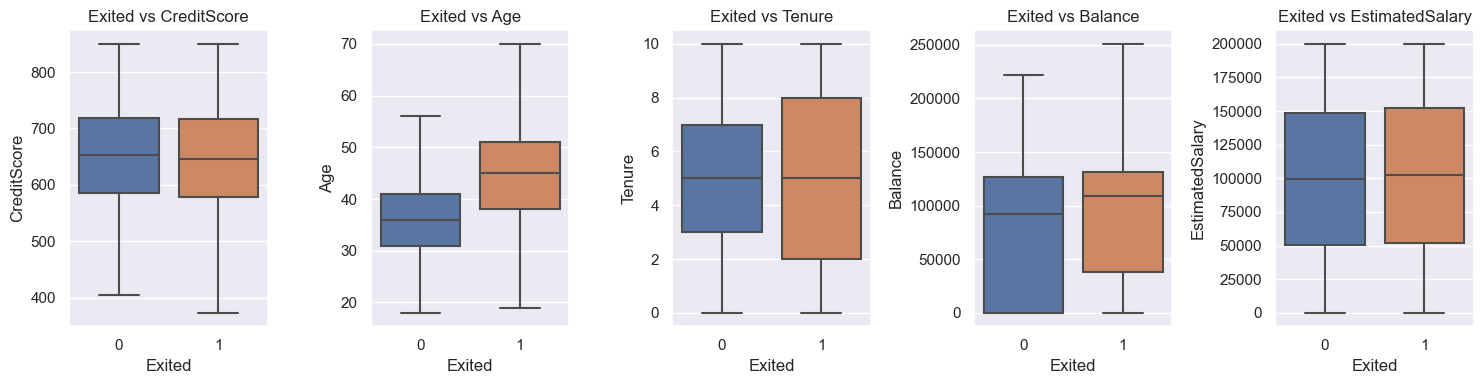

In [24]:
# boxplot fitur numerik terhadap target (tanpa outliers)
plt.figure(figsize=(15, 4))
for i, feature in enumerate(numerik, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(data=df_raw, x='Exited', y=feature, showfliers= False)
    plt.title(f'Exited vs {feature}')
plt.tight_layout()
plt.show()

Negatively skewed: - <br>
Positively skewed: Age <br>
bimodal : Balance <br>
multimodal : - <br>
nilai yang mendominasi:<br>
Untuk setiap kolom, CreditScore pada kisaran 600-700, Balance jika dilihat dari frekuensi pada kisaran 0 dan pada rentang nilai pada 100000--150000. Untuk kolom kategorik, nilai Geography dominan pada wilayah France, Gender dominan pada Male, IsActiveMember dan HasCrCard dominan pada customer yang memiliki dan Exited pada customer yang tidak churn. <br>
kategorinya terlalu banyak: -

Hal yang harus di-follow up saat data pre-processing <br>
- Memfilter data outlier <br>
- Melakukan feature transformation seperti normalisasi atau standarisasi <br>
- Membuat feature encoding pada geography dan age untuk membuat model <br>
- Melakukan handle class imbalance

tidak perlu menghapus data duplikat karena tidak ada data yang duplikat dan mengisi missing values tidak dilakukan karena tidak ada data null pada dataset tersebut.

# Multivariate Analysis

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

rcParams['figure.figsize'] = (10, 7)
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

<Axes: >

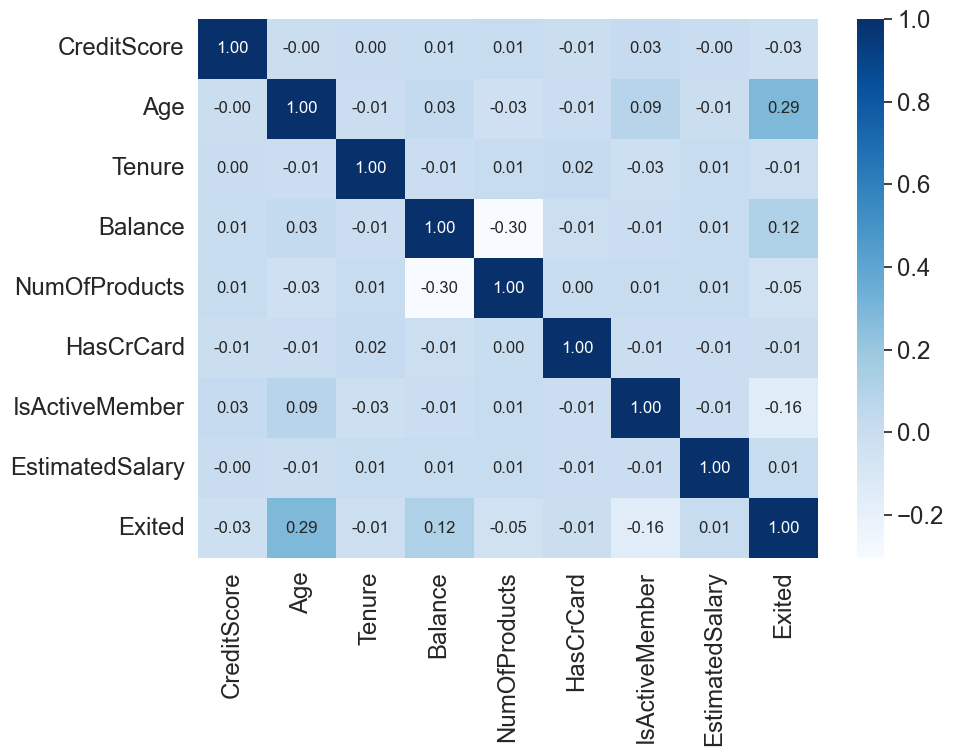

In [27]:
#drop kolom dari df raw
df_raw = df_raw.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Membuat heatmap
numeric_df = df_raw.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), cmap='Blues', annot=True, fmt='.2f')

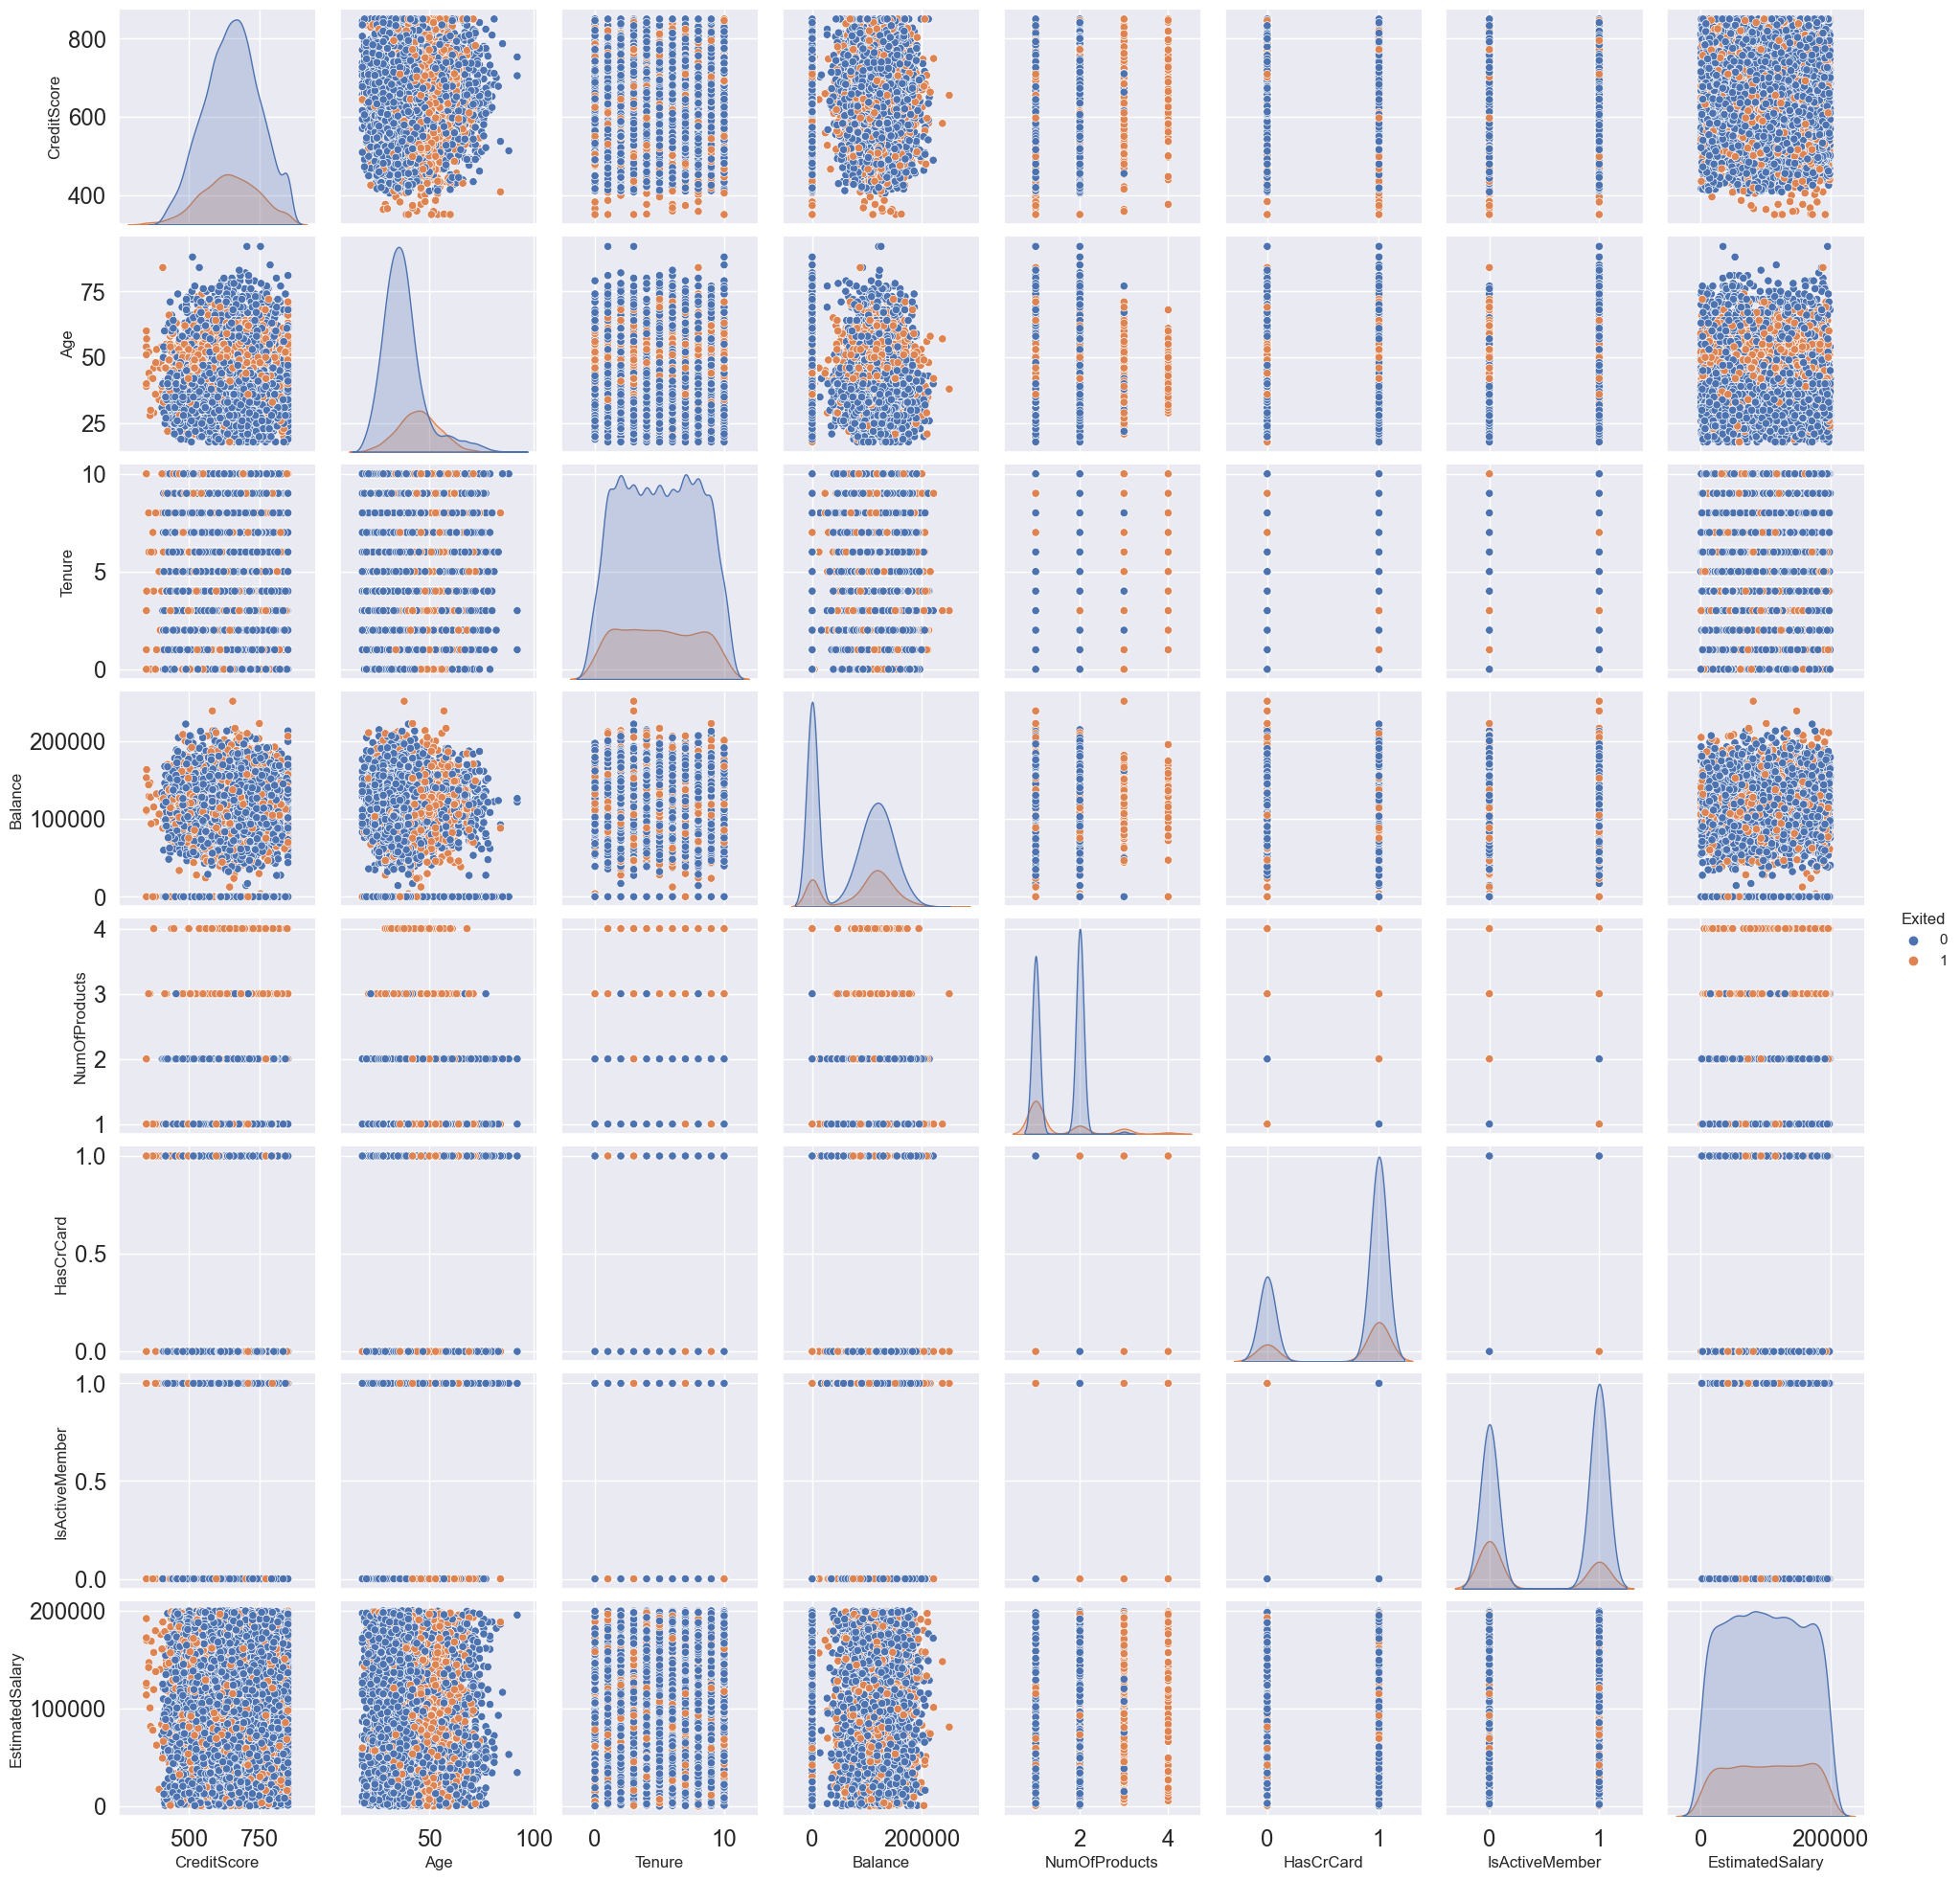

In [29]:
sns.pairplot(df_raw, diag_kind='kde', hue='Exited')

In [32]:
from sklearn.feature_selection import mutual_info_classif

X = df_raw.drop(columns=['Exited'])
y= df['Exited']

def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()

    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)

    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

make_mi_scores(X, y)

Age                0.074316
NumOfProducts      0.069953
CreditScore        0.026719
Geography          0.014017
IsActiveMember     0.012291
Balance            0.008269
Gender             0.005652
EstimatedSalary    0.002704
Tenure             0.000703
HasCrCard          0.000025
Name: MI Scores, dtype: float64

In [42]:
from sklearn.feature_selection import chi2

X = df_raw.drop(columns=['Exited'])
y= df['Exited']
for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()

chi2_stats, p_values = chi2(X, y) 
chi2_stats = pd.Series(chi2_stats, name="Chi2 Scores", index=X.columns)
chi2_stats = chi2_stats.sort_values(ascending=False)
print(chi2_stats)

Balance            7.151303e+06
EstimatedSalary    4.835088e+04
Age                2.300417e+03
Geography          2.175407e+02
IsActiveMember     1.181994e+02
CreditScore        1.054035e+02
Gender             5.153993e+01
NumOfProducts      5.055394e+00
Tenure             3.270538e+00
HasCrCard          1.500410e-01
Name: Chi2 Scores, dtype: float64


In [43]:
p_values = pd.Series(p_values, name="p_value", index=X.columns)
p_values = p_values.sort_values(ascending=False)
print(p_values)

HasCrCard          6.984962e-01
Tenure             7.053449e-02
NumOfProducts      2.454940e-02
Gender             7.015575e-13
CreditScore        9.963536e-25
IsActiveMember     1.568036e-27
Geography          3.110564e-49
Age                0.000000e+00
Balance            0.000000e+00
EstimatedSalary    0.000000e+00
Name: p_value, dtype: float64


In [44]:
from sklearn.feature_selection import f_classif


X = df_raw.drop(columns=['Exited'])
y= df['Exited']
for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
        
f_statistic, p_values = f_classif(X, y)
f_statistic = pd.Series(f_statistic, name="f Scores", index=X.columns)
f_statistic = f_statistic.sort_values(ascending=False)
print(f_statistic)

Age                886.063275
IsActiveMember     249.800794
Geography          242.131922
Balance            142.473832
Gender             114.727989
NumOfProducts       22.915223
CreditScore          7.344522
Tenure               1.960164
EstimatedSalary      1.463262
HasCrCard            0.509401
Name: f Scores, dtype: float64


In [45]:
p_values = pd.Series(p_values, name="p_value", index=X.columns)
p_values = p_values.sort_values(ascending=False)
print(p_values)

HasCrCard           4.754149e-01
EstimatedSalary     2.264404e-01
Tenure              1.615268e-01
CreditScore         6.738214e-03
NumOfProducts       1.717333e-06
Gender              1.258505e-26
Balance             1.275563e-32
Geography           5.775914e-54
IsActiveMember      1.348269e-55
Age                1.239931e-186
Name: p_value, dtype: float64


Jika dilihat dari tabel korelasi diatas, dapat dilihat bahwa:
A.<br>
1. Age dan Balance menunjukkan nilai korelasi paling besar dan bernilai positif, dimana kemungkinan apabila semakin umur nya besar kemungkinan akan churn, dan balance makin besar maka churn juga akan semakin tinggi.<br>
2. Untuk IsActiveMember menunjukkan korelasi negatif dan bernilai -0,16 menunjukkan bahwa apabila nasabah tidak aktif maka kemungkinan churn akan semakin tinggi.<br>
3. Sedangkan untuk Credit Score, Tenure, Numof Product, Has Credit Card, dan Estimated Salary menunjukkan nilai yang sangat kecil <0,1.<br>

B. Tidak ada pola yang menarik (Dalam pairplot tidak ada kumpulan titik-titik yang lurus.

# Business Insight

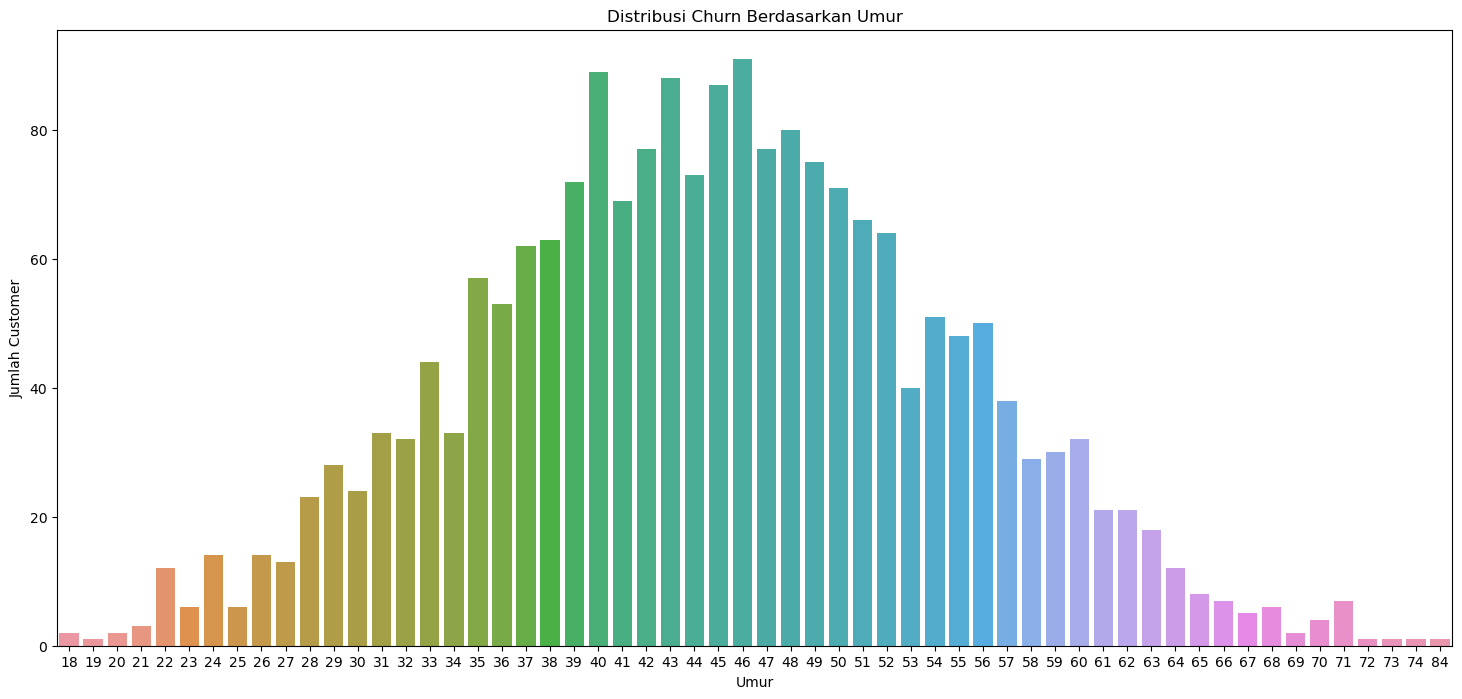

In [56]:
# Melihat Churn dari Umur
df_age = df_raw.groupby(['Age', 'Exited'])['Balance'].count().reset_index()
df_age = df_age[df_age['Exited']==1].reset_index()
df_age.head(10)

plt.figure(figsize=(18, 8))
sns.barplot(x='Age', y='Balance', data=df_age)
plt.title('Distribusi Churn Berdasarkan Umur')
plt.xlabel('Umur')
plt.xticks(rotation=0)
plt.ylabel('Jumlah Customer')
plt.show()

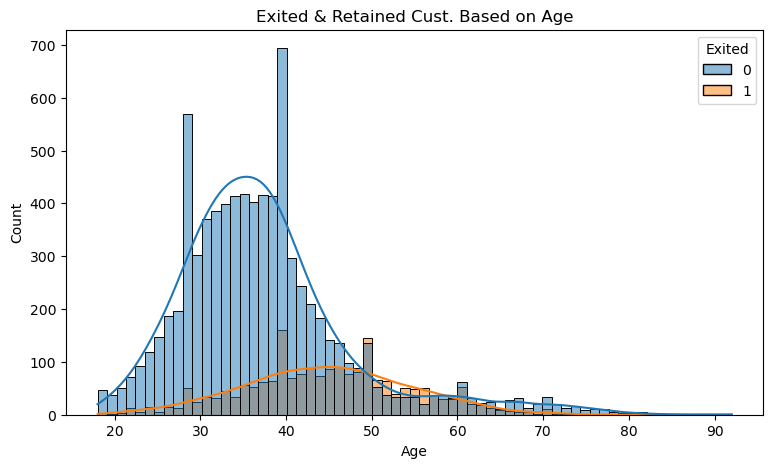

In [39]:
#Distribusi Exited & Retained Customer berdasarkan Umur
fig, ax = plt.subplots(figsize=(9,5))

ax.set_title('Exited & Retained Cust. Based on Age')
sns.histplot(x = 'Age', hue='Exited',data = df_raw, kde = True, ax=ax)

plt.show()

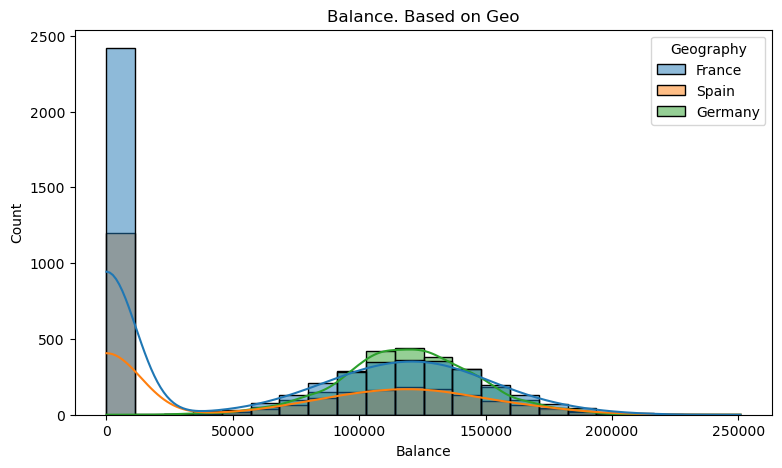

In [40]:
#Distribusi Balance berdasarkan Geography
fig, ax = plt.subplots(figsize=(9,5))

ax.set_title('Balance. Based on Geo')
sns.histplot(x = 'Balance', hue='Geography',data = df_raw, kde = True, ax=ax)

plt.show()

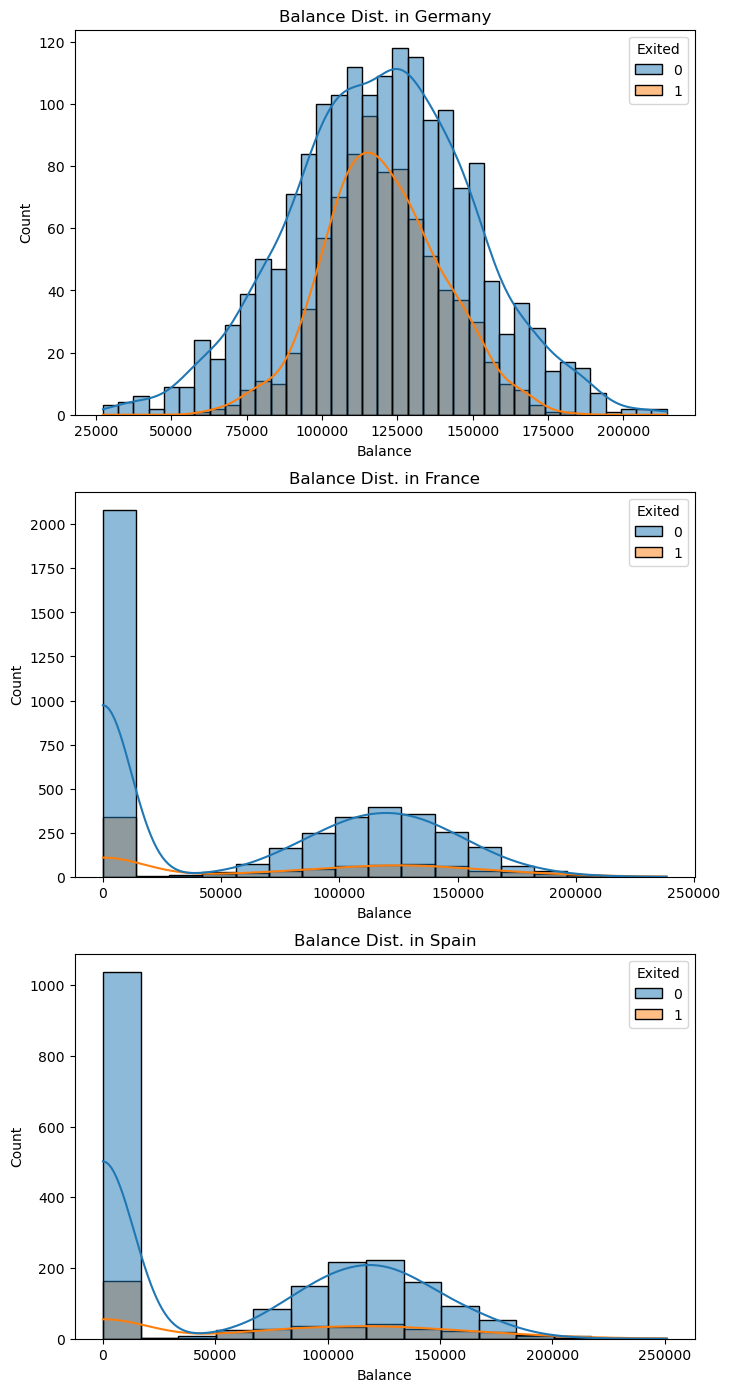

In [41]:
#Distribusi Balance pada masing-masing Geography
fig, ax = plt.subplots(3,1, figsize=(8,17))

#ploting data on chart
sns.histplot(x = 'Balance', hue='Exited',data = df_raw[df_raw['Geography']=='Germany'], kde = True, ax=ax[0])
sns.histplot(x = 'Balance', hue='Exited',data = df_raw[df_raw['Geography']=='France'], kde = True, ax=ax[1])
sns.histplot(x = 'Balance', hue='Exited',data = df_raw[df_raw['Geography']=='Spain'], kde = True, ax=ax[2])


#set title
ax[0].set_title('Balance Dist. in Germany')
ax[1].set_title('Balance Dist. in France')
ax[2].set_title('Balance Dist. in Spain')


#displaying the chart
plt.show()

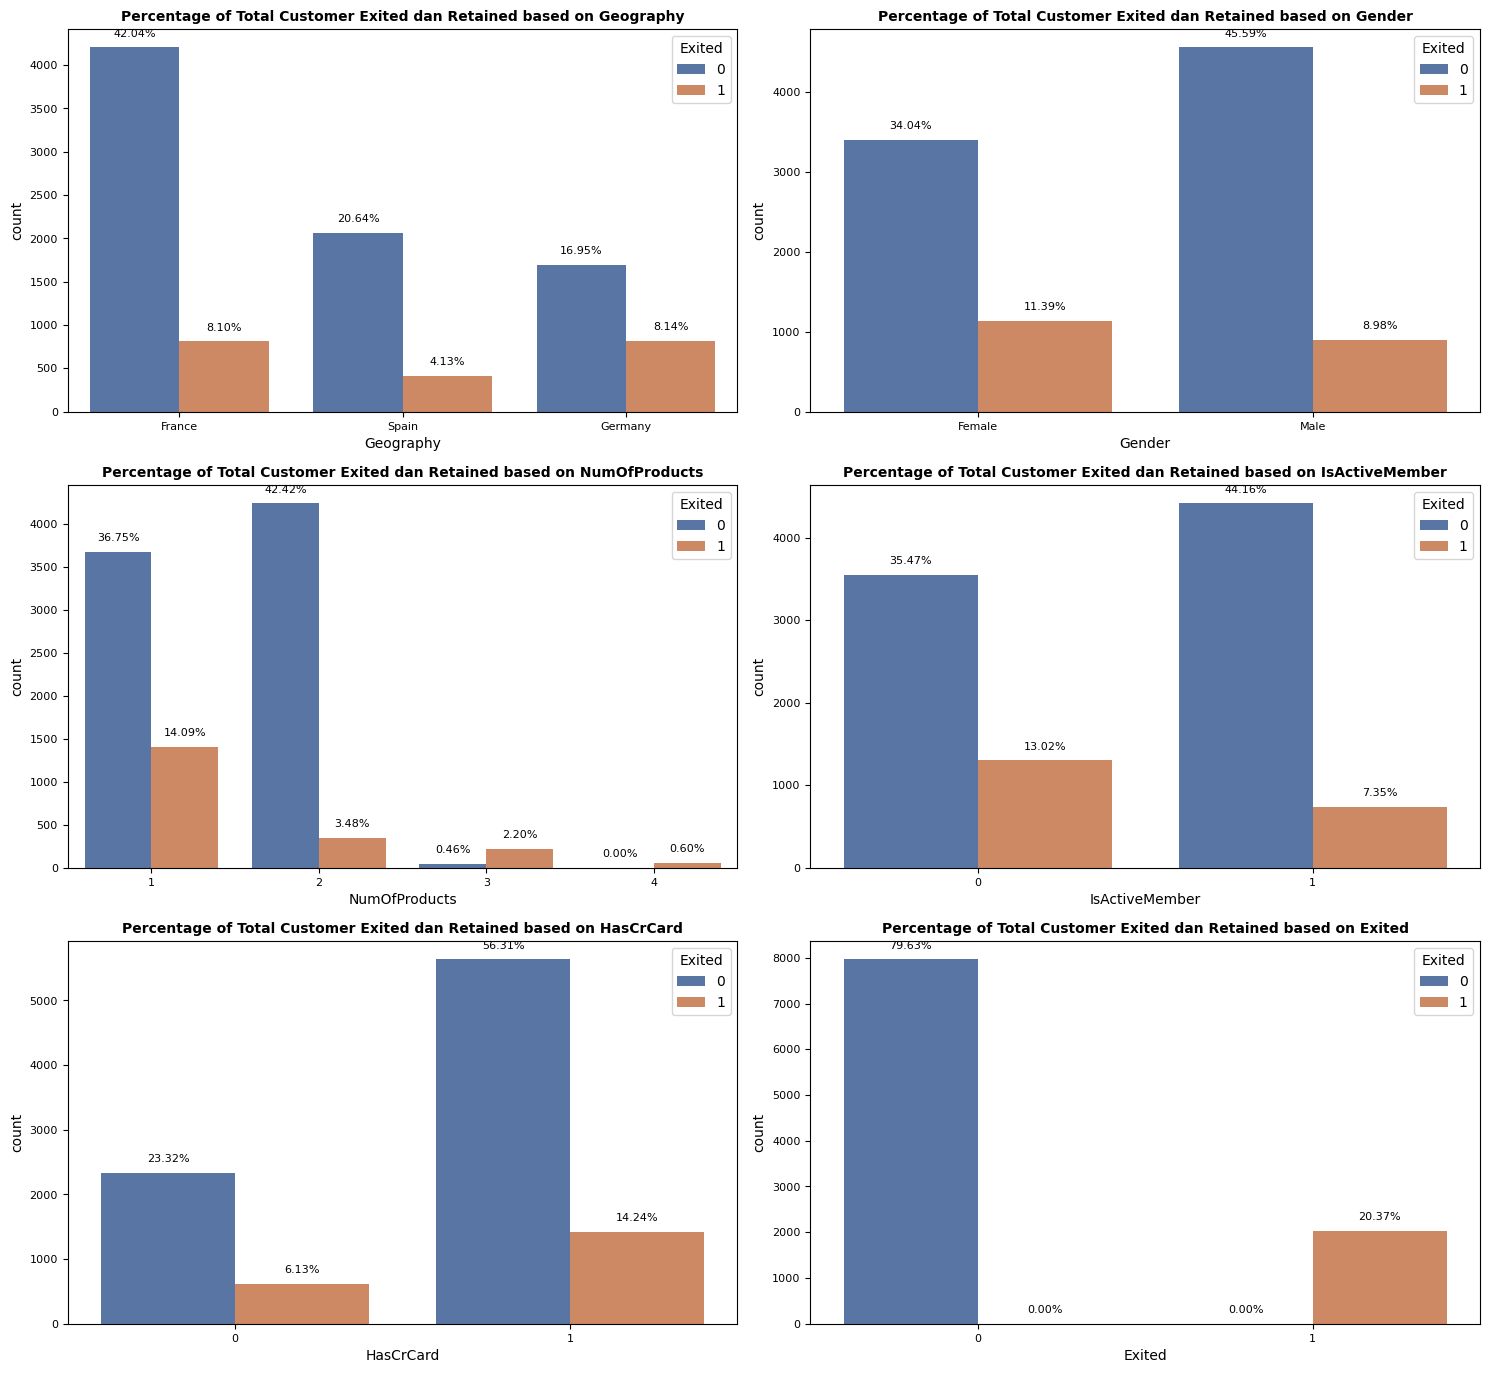

In [52]:
#Melihat % Nasabah Churn dan Retained berdasarkan fitur yang ada
plt.figure(figsize=(15,18))

for i in range (len(kategorik)):
    plt.subplot(4,2,i+1)
    ax = sns.countplot(data=df, x=kategorik[i], hue="Exited", palette="deep")
    total_data = len(df[df[kategorik[i]].notnull()])
    for p in ax.patches:
        percentage = 100 * p.get_height() / total_data
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', size = 8)

    plt.title(f"Percentage of Total Customer Exited dan Retained based on {kategorik[i]}", size=10, fontweight = 'bold')
    plt.tick_params(axis='x', labelsize=8)
    plt.tick_params(axis='y', labelsize=8)
    plt.tight_layout()

# SUMMARY

**Business Insight:**
1. Geography

- Berdasarkan pengelompokan geografinya, Germany memiliki nilai churn paling besar dibanding France dan Spain yaitu 32,44%. 
- Perlu dilakukan evaluasi pada nasabah Germany dikarenakan dengan Total Jumlah Nasabah yang lebih sedikit dibandingkan dengan France, namun Germany memiliki %Churn lebih tinggi.
- Persentase Churn untuk France dan Spain hampir sama yaitu di 16%

2. Gender

- Nasabah perempuan memiliki persentase Churn lebih besar daripada nasabah laki-laki yaitu 25.07%

3. Balance

- Berdasarkan nilai yang mendominasi, balance paling banyak terjadi pada balance 0 dan rentang 100000 - 150000
- Jika melihat distribusi balance per geography, Germany memiliki balance terbanyak pada rentang 100000 - 150000 sedangkan France dan Spain balance terbanyak pada balance 0.

4. Geography dan Balance

- Berdasarkan perhitungan churn per Geography sebelumnya, didapatkan nilai churn paling besar pada Germany berkisar 32%. Pada grafik kde-plot, dapat dilihat adanya churn pada Nasabah Germany yang mempunyai balance 100000 - 15000. Seharusnya, nasabah yang mempunyai balance yang cukup besar tidak akan mempunyai keinginan untuk churn.
- Dengan demikian, kita dapat simpulkan bahwa adanya problem pada nasabah Germany.
- Berdasarkan perhitungan churn di France dan Spain, churn masih berkisar 16 %. Angka tersebut masih dianggap cukup besar untuk churn. Jika melihat balancenya, ternyata nasabah France dan Spain memiliki banyak nasabah yang memiliki saldo 0 sehingga memiliki kecenderungan untuk churn.

5. Number of Product

- Dari analisis yang dilakukan, Nasabah paling banyak churn berdasarkan NumOfProduct yang dimiliki dari setiap masing- masing produk dan dari total keseluruhan NumofProduct adalah nasabah yang memiliki jumlah product di bank sebanyak 1. Dengan persentase 27,71% dan 14,09%.
- Nasabah bank banyak menggunakan 2 produk dengan nilai churn yang kecil
- Sehingga perlu dilakukan evaluasi dan treatment untuk Nasabah dengan 1 produk agar meningkatkan penggunaan produk nya menjadi 2, karena Nasabah dengan 2 produk churn cenderung kecil.

6. Age

- Pada rentang usia 40 tahun hingga 50 tahun, jumlah Nasabah yang retained cenderung menurun, namun jumlah customer yang exited meningkat. Dengan kata lain pada rentang usia tersebut % churn meningkat.

**Business Recomendation**

1. Geography

- Menganalisis lebih lanjut kondisi bisnis pada geography ‘Germany’ untuk memeriksa kemungkinan adanya kompetitor bisnis yang lebih baik sehingga dapat dilakukan benchmarking terhadap kompetitor.
- Customers pada geography ‘Spain’ dan ‘France’ memiliki akun dengan balance 0 yang cukup tinggi, hal itu meningkatkan kecenderungan customers untuk churn. Sebagai rekomendasi, tim bisnis dapat menawarkan produk-produk rendah bunga dan minim deposit yang dapat menjangkau customers yang akan churn untuk mengaktifkan kembali akunnya, karena berdasarkan data, customer yang aktif memiliki kecenderungan untuk tidak ‘churn’.

2. Gender

- Menawarkan produk-produk yang spesifik sesuai personality dan kebutuhan perempuan karena nasabah perempuan lebih cenderung untuk churn. seperti : Lady’s Card berupa kartu untuk nasabah perempuan yang mandiri secara finasial/ wanita karir, Produk investasi untuk perempuan yang sudah menikah/berkeluarga.

3. Number of Product

- Meningkatkan Nasabah dari yang memiliki produk 1 menjadi produk 2 dengan cara promosi bundling produk.

4. Age

- Memberikan promosi seperti diskon pembelian makan jika melakukan pembayaran bank tersebut dengan target nasabah usia produktif bekerja (40 tahun ke atas). Menawarkan produk persiapan pensiun dengan return yang tinggi kepada target nasabah usia 40-50 tahun.